<a href="https://colab.research.google.com/github/Nimanthas/voice_emotion_model/blob/main/voice_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ejlok1/surrey-audiovisual-expressed-emotion-savee

In [ ]:
!unzip /content/surrey-audiovisual-expressed-emotion-savee.zip -d /content/drive/MyDrive/data/voice/savee

In [ ]:
!apt-get update
!apt-get install -y libsndfile1

In [ ]:
!pip install keras.preprocessing

In [74]:
import os
import pandas as pd
import numpy as np

In [75]:
# Paths for data.
TESS = "/content/drive/MyDrive/data/voice/TESS Toronto emotional speech set data/"
RAVDESS = "/content/drive/MyDrive/data/voice/Ravdess/"
CREMA = "/content/drive/MyDrive/data/voice/AudioWAV/"
SAVEE = "/content/drive/MyDrive/data/voice/savee/ALL/"

In [76]:
ravdess_dir_lis = os.listdir(RAVDESS)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    '03' : 'happy',
    '01' : 'neutral',
    '04' : 'sad',
    '05' : 'angry',
    '06' : 'fear',
    '07' : 'disgust',
}

for directory in ravdess_dir_lis:
    actor_files = os.listdir(os.path.join(RAVDESS, directory))
    for audio_file in actor_files:
        part = audio_file.split('.')[0]
        key = part.split('-')[2]
        if key in emotion_dic:
            gender_code = int(part.split('-')[6])
            path_list.append(f"{RAVDESS}{directory}/{audio_file}")
            gender_list.append('female' if gender_code & 1 == 0 else 'male')
            emotion_list.append(emotion_dic[key])

ravdess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

ravdess_df.head()

,path,sex,emotion
0,/content/drive/MyDrive/data/voice/Ravdess/Acto...,male,neutral
1,/content/drive/MyDrive/data/voice/Ravdess/Acto...,male,neutral
2,/content/drive/MyDrive/data/voice/Ravdess/Acto...,male,neutral
3,/content/drive/MyDrive/data/voice/Ravdess/Acto...,male,neutral
4,/content/drive/MyDrive/data/voice/Ravdess/Acto...,male,happy


In [77]:
crema_dir_list = os.listdir(CREMA)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'HAP' : 'happy',
    'NEU' : 'neutral',
    'SAD' : 'sad',
    'ANG' : 'angry',
    'FEA' : 'fear',
    'DIS' : 'disgust',
}

female_id_list = [
    '1002', '1003', '1004', '1006', '1007', '1008', '1009', '1010', '1012', '1013', '1018',
    '1020', '1021', '1024', '1025', '1028', '1029', '1030', '1037', '1043', '1046', '1047',
    '1049', '1052', '1053', '1054', '1055', '1056', '1058', '1060', '1061', '1063', '1072',
    '1073', '1074', '1075', '1076', '1078', '1079', '1082', '1084', '1089', '1091',
]

for audio_file in crema_dir_list:
    part = audio_file.split('_')
    key = part[2]
    if key in emotion_dic and part[3] == 'HI.wav':
        path_list.append(f"{CREMA}{audio_file}")
        gender_list.append('female' if part[0] in female_id_list else 'male')
        emotion_list.append(emotion_dic[key])

crema_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

crema_df.head()

,path,sex,emotion
0,/content/drive/MyDrive/data/voice/AudioWAV/100...,male,angry
1,/content/drive/MyDrive/data/voice/AudioWAV/100...,male,disgust
2,/content/drive/MyDrive/data/voice/AudioWAV/100...,male,fear
3,/content/drive/MyDrive/data/voice/AudioWAV/100...,male,happy
4,/content/drive/MyDrive/data/voice/AudioWAV/100...,male,sad


In [78]:
tess_dir_list = os.listdir(TESS)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'happy'   : 'happy',
    'neutral' : 'neutral',
    'sad'     : 'sad',
    'Sad'     : 'sad',
    'angry'   : 'angry',
    'fear'    : 'fear',
    'disgust'  : 'disgust',
}

for directory in tess_dir_list:
    audio_files = os.listdir(os.path.join(TESS, directory))
    for audio_file in audio_files:
        part = audio_file.split('.')[0]
        key = part.split('_')[2]
        if key in emotion_dic:
            path_list.append(f"{TESS}{directory}/{audio_file}")
            gender_list.append('female') # female only dataset
            emotion_list.append(emotion_dic[key])

tess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

tess_df.head()

,path,sex,emotion
0,/content/drive/MyDrive/data/voice/TESS Toronto...,female,fear
1,/content/drive/MyDrive/data/voice/TESS Toronto...,female,fear
2,/content/drive/MyDrive/data/voice/TESS Toronto...,female,fear
3,/content/drive/MyDrive/data/voice/TESS Toronto...,female,fear
4,/content/drive/MyDrive/data/voice/TESS Toronto...,female,fear


In [79]:
savee_dir_list = os.listdir(SAVEE)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'h'  : 'happy',
    'n'  : 'neutral',
    'sa' : 'sad',
    'a'  : 'angry',
    'f'  : 'fear',
    'd'  : 'disgust'
}

for audio_file in savee_dir_list:
    part = audio_file.split('_')[1]
    key = part[:-6]
    if key in emotion_dic:
        path_list.append(f"{SAVEE}{audio_file}")
        gender_list.append('male') # male only dataset
        emotion_list.append(emotion_dic[key])

savee_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

savee_df.head()

,path,sex,emotion
0,/content/drive/MyDrive/data/voice/savee/ALL/DC...,male,angry
1,/content/drive/MyDrive/data/voice/savee/ALL/DC...,male,angry
2,/content/drive/MyDrive/data/voice/savee/ALL/DC...,male,angry
3,/content/drive/MyDrive/data/voice/savee/ALL/DC...,male,angry
4,/content/drive/MyDrive/data/voice/savee/ALL/DC...,male,angry


In [80]:
df = pd.concat([
    ravdess_df,
    crema_df,
    tess_df,
    savee_df
], axis=0)
df.head()

,path,sex,emotion
0,/content/drive/MyDrive/data/voice/Ravdess/Acto...,male,neutral
1,/content/drive/MyDrive/data/voice/Ravdess/Acto...,male,neutral
2,/content/drive/MyDrive/data/voice/Ravdess/Acto...,male,neutral
3,/content/drive/MyDrive/data/voice/Ravdess/Acto...,male,neutral
4,/content/drive/MyDrive/data/voice/Ravdess/Acto...,male,happy


In [81]:
import librosa
import matplotlib.pyplot as plt

plt.style.use('ggplot')

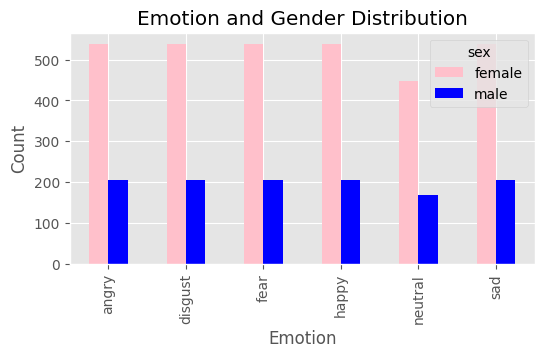

In [82]:
def plot_distribution(df):
    countTable = df.groupby(['emotion', 'sex']).count()
    pivotTable = countTable.pivot_table(index='emotion', columns='sex', values='path')

    pivotTable.plot(kind='bar', figsize=(6, 3), color=['pink', 'blue'])
    plt.title('Emotion and Gender Distribution')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.show()

plot_distribution(df)

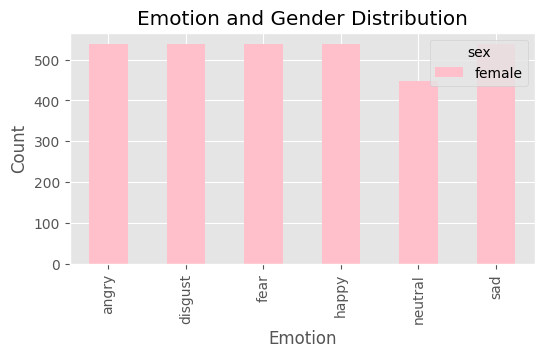

In [83]:
# I decided to go with a female specific model
df = df[df['sex'] == 'female']
plot_distribution(df)

In [84]:
df.drop('sex', axis=1, inplace=True)
df.head()

,path,emotion
44,/content/drive/MyDrive/data/voice/Ravdess/Acto...,neutral
45,/content/drive/MyDrive/data/voice/Ravdess/Acto...,neutral
46,/content/drive/MyDrive/data/voice/Ravdess/Acto...,neutral
47,/content/drive/MyDrive/data/voice/Ravdess/Acto...,neutral
48,/content/drive/MyDrive/data/voice/Ravdess/Acto...,happy


In [85]:
from IPython.display import Audio

def create_waveplot(y, sr, title):
    plt.figure(figsize=(8, 2))
    plt.title(title)
    librosa.display.waveshow(y, sr=sr)
    plt.show()

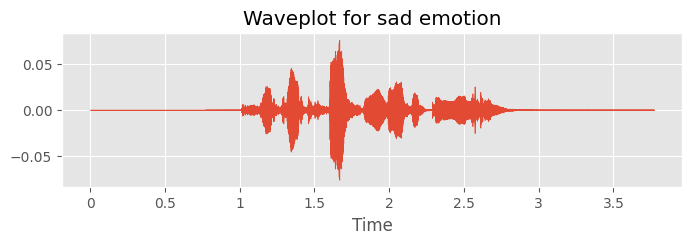

In [86]:
emotion_label = 'sad'
title = f"Waveplot for {emotion_label} emotion"
path = np.array(df.path[df.emotion == emotion_label])[1]
y, sr = librosa.load(path)

create_waveplot(y, sr, title)
Audio(path)

In [88]:
!pip install pydub

In [89]:
from pydub import AudioSegment, effects

In [90]:
def preprocess_audio(path):
    _, sr = librosa.load(path)
    raw_audio = AudioSegment.from_file(path)

    samples = np.array(raw_audio.get_array_of_samples(), dtype='float32')
    trimmed, _ = librosa.effects.trim(samples, top_db=25)
    padded = np.pad(trimmed, (0, 180000-len(trimmed)), 'constant')
    return padded, sr

In [91]:
emotion_dic = {
    'neutral' : 0,
    'happy'   : 1,
    'sad'     : 2,
    'angry'   : 3,
    'fear'    : 4,
    'disgust' : 5
}

def encode(label):
    return emotion_dic.get(label)

In [92]:
zcr_list = []
rms_list = []
mfccs_list = []
emotion_list = []

FRAME_LENGTH = 2048
HOP_LENGTH = 512

for row in df.itertuples(index=False):
    try:
        y, sr = preprocess_audio(row.path)

        zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)

        zcr_list.append(zcr)
        rms_list.append(rms)
        mfccs_list.append(mfccs)

        emotion_list.append(encode(row.emotion))
    except:
        print(f"Failed for path: {row.path}")

Failed for path: /content/drive/MyDrive/data/voice/Ravdess/Actor_20/03-01-06-01-01-02-20.wav


In [93]:
X = np.concatenate((
    np.swapaxes(zcr_list, 1, 2),
    np.swapaxes(rms_list, 1, 2),
    np.swapaxes(mfccs_list, 1, 2)),
    axis=2
)
X = X.astype('float32')

y = np.asarray(emotion_list)
y = np.expand_dims(y, axis=1).astype('int8')

In [94]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [95]:
X_train, X_to_split, y_train, y_to_split = train_test_split(X, y, test_size=0.12, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_to_split, y_to_split, test_size=0.3, random_state=1)

y_train_class = to_categorical(y_train, 6)
y_val_class = to_categorical(y_val, 6)

In [96]:
from keras.models import Sequential
from keras import layers, optimizers, callbacks

In [97]:
MODEL = Sequential()
MODEL.add(layers.LSTM(64, return_sequences=True, input_shape=(X.shape[1:3])))
MODEL.add(layers.LSTM(64))
MODEL.add(layers.Dense(6, activation='softmax'))

print(MODEL.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 352, 64)           20480     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 53,894
Trainable params: 53,894
Non-trainable params: 0
_________________________________________________________________
None


In [98]:
rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.01, patience=100)
MODEL.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['categorical_accuracy'])
model = MODEL.fit(X_train, y_train_class, epochs=200, batch_size=6, validation_data=(X_val, y_val_class))

Epoch 1/200
461/461 [==============================] - 196s 404ms/step - loss: 1.6262 - categorical_accuracy: 0.2822 - val_loss: 1.4949 - val_categorical_accuracy: 0.2841
Epoch 2/200
461/461 [==============================] - 205s 445ms/step - loss: 1.4309 - categorical_accuracy: 0.3716 - val_loss: 1.3837 - val_categorical_accuracy: 0.3939
Epoch 3/200
461/461 [==============================] - 184s 400ms/step - loss: 1.2507 - categorical_accuracy: 0.5022 - val_loss: 1.2598 - val_categorical_accuracy: 0.4886
Epoch 4/200
461/461 [==============================] - 175s 379ms/step - loss: 1.1639 - categorical_accuracy: 0.5347 - val_loss: 1.1190 - val_categorical_accuracy: 0.5644
Epoch 5/200
461/461 [==============================] - 171s 372ms/step - loss: 1.1187 - categorical_accuracy: 0.5554 - val_loss: 1.1631 - val_categorical_accuracy: 0.5114
Epoch 6/200
461/461 [==============================] - 174s 377ms/step - loss: 1.0466 - categorical_accuracy: 0.6002 - val_loss: 1.0890 - val_cat

In [99]:
from sklearn.metrics import confusion_matrix

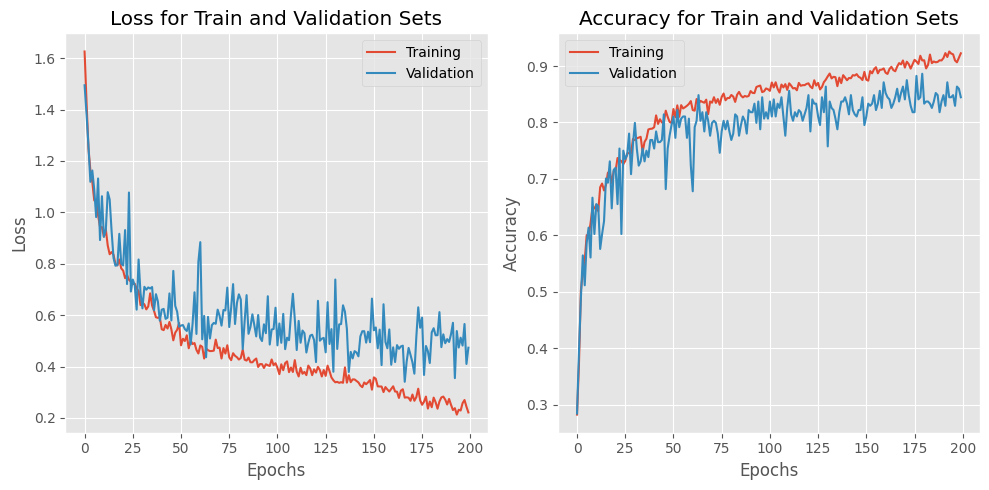

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(model.history['loss'])
axes[0].plot(model.history['val_loss'])
axes[0].set_title('Loss for Train and Validation Sets')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epochs')
axes[0].legend(['Training', 'Validation'])

axes[1].plot(model.history['categorical_accuracy'])
axes[1].plot(model.history['val_categorical_accuracy'])
axes[1].set_title('Accuracy for Train and Validation Sets')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].legend(['Training', 'Validation'])

fig.tight_layout()

plt.show()

9/9 [==============================] - 4s 190ms/step


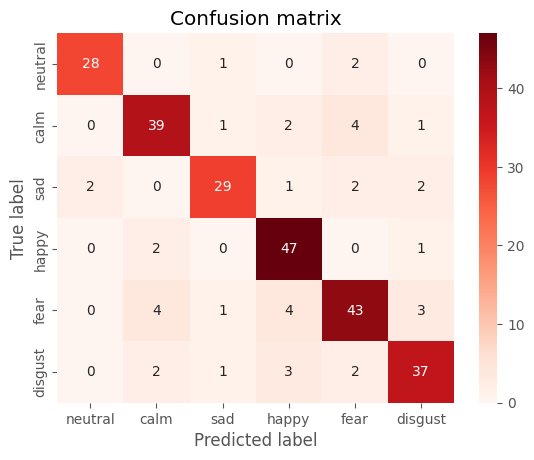

In [101]:
import seaborn as sns

y_pred = np.argmax(MODEL.predict(X_val), axis=1)
labels = ['neutral', 'calm', 'sad', 'happy', 'fear', 'disgust']
cm = confusion_matrix(np.argmax(y_val_class, axis=1), y_pred, labels=range(6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [104]:
MODEL.save("voice_model_ved.h5")

In [106]:
import shutil

# Source and destination paths
source_path = '/content/voice_model_ved.h5'
destination_path = '/content/drive/MyDrive/model'

# Copy the file
shutil.copy(source_path, destination_path)

'/content/drive/MyDrive/model/voice_model_ved.h5'

testing

In [107]:
!pip install pandas numpy librosa matplotlib pydub tensorflow scikit-learn seaborn

In [108]:
import os
import pandas as pd
import numpy as np
import librosa
from pydub import AudioSegment, effects
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model

In [109]:
emotion_dic = {
    'neutral': 0,
    'happy': 1,
    'sad': 2,
    'angry': 3,
    'fear': 4,
    'disgust': 5
}

def encode(label):
    return emotion_dic.get(label)


In [110]:
def preprocess_audio(path):
    _, sr = librosa.load(path)
    raw_audio = AudioSegment.from_file(path)

    samples = np.array(raw_audio.get_array_of_samples(), dtype='float32')
    trimmed, _ = librosa.effects.trim(samples, top_db=25)
    padded = np.pad(trimmed, (0, 180000 - len(trimmed)), 'constant')
    return padded, sr


In [111]:
model = load_model("voice_model_ved.h5")


In [112]:
example_audio_path = "/content/drive/MyDrive/data/voice/TESS Toronto emotional speech set data/OAF_Sad/OAF_back_sad.wav"

In [117]:
def test_single_audio(audio_path):
    y, sr = preprocess_audio(audio_path)

    zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
    rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)

    # Ensure that all feature arrays have the same shape
    max_len = min(zcr.shape[1], rms.shape[1], mfccs.shape[1])
    zcr = zcr[:, :max_len]
    rms = rms[:, :max_len]
    mfccs = mfccs[:, :max_len]

    X_test = np.concatenate((zcr, rms, mfccs), axis=0)  # Concatenate along axis 0
    X_test = X_test.T  # Transpose to match the shape
    X_test = X_test.astype('float32')

    y_pred = model.predict(np.expand_dims(X_test, axis=0))
    emotion_labels = ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust']
    predicted_emotion = emotion_labels[np.argmax(y_pred)]

    print(f"Predicted Emotion: {predicted_emotion}")


1/1 [==============================] - 3s 3s/step
Predicted Emotion: sad


In [118]:
test_single_audio(example_audio_path)

1/1 [==============================] - 0s 121ms/step
Predicted Emotion: sad
